# The Spark Foundation Internship


# Prediction Using Unsupervised ML

# Created by: Gautam Sharma

In [5]:
#Loading the required libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [6]:
# the first 5 rows of the dataframe
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [7]:
#the column names
print(iris_df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


In [8]:
#null values count
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [9]:
#info
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#statistical info
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis

 Univariate Analysis

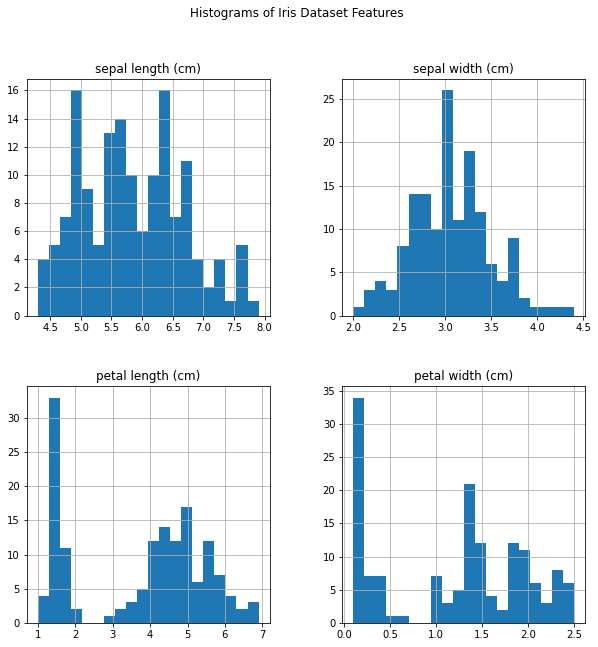

In [11]:
# Histograms for each feature
iris_df.hist(bins=20, figsize=(10, 10))
plt.suptitle('Histograms of Iris Dataset Features')
plt.show()

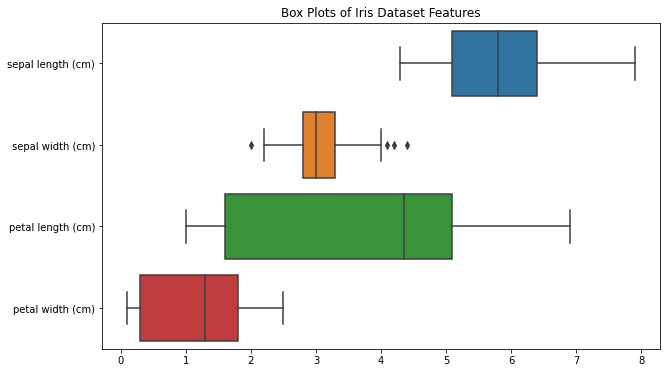

In [12]:
# Box plots for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, orient="h")
plt.title('Box Plots of Iris Dataset Features')
plt.show()


# Bivariate Analysis

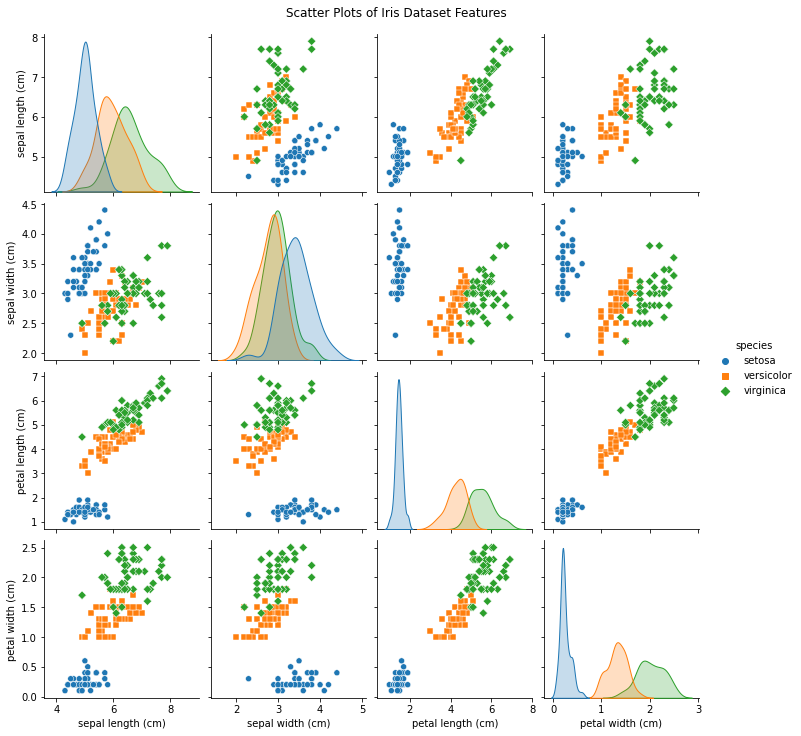

In [13]:
# Scatter plots for each pair of features, colored by species
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Scatter Plots of Iris Dataset Features', y=1.02)
plt.show()

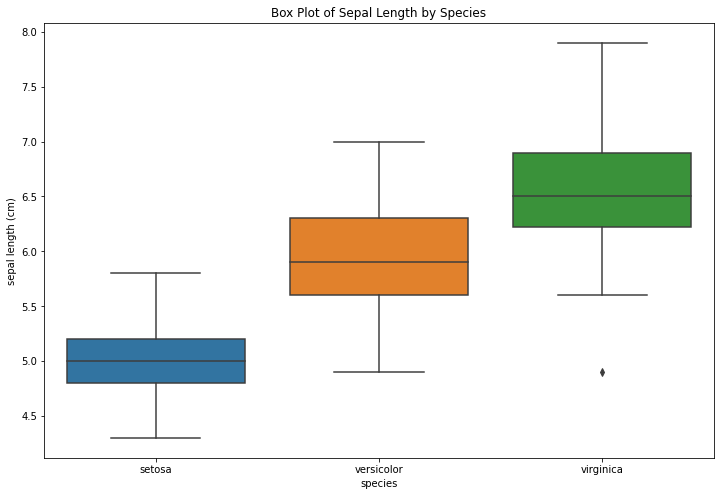

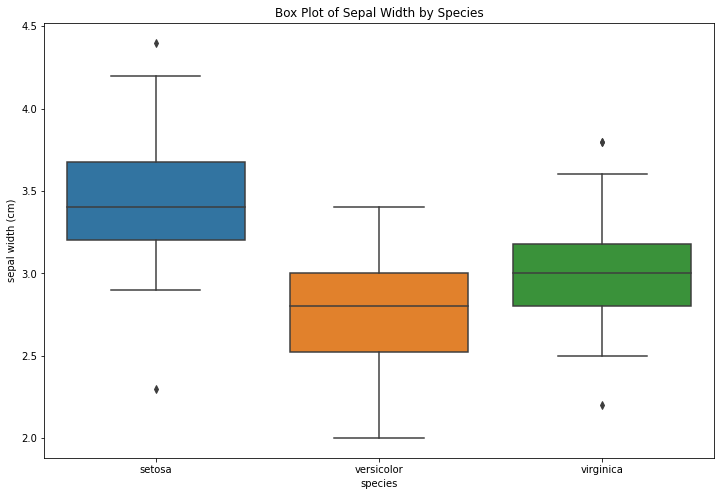

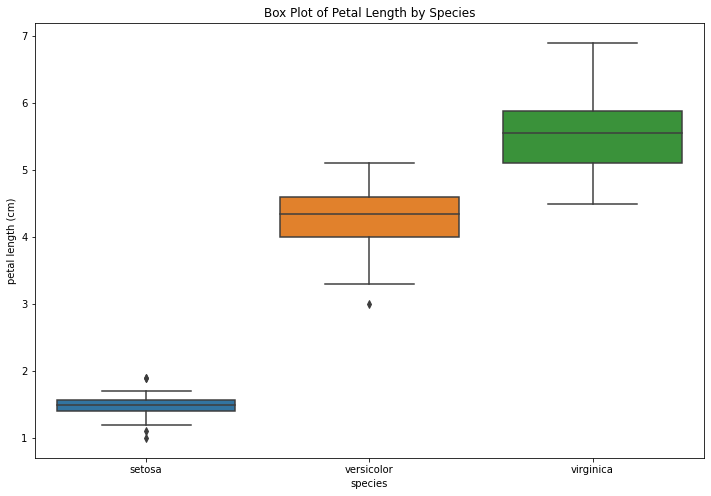

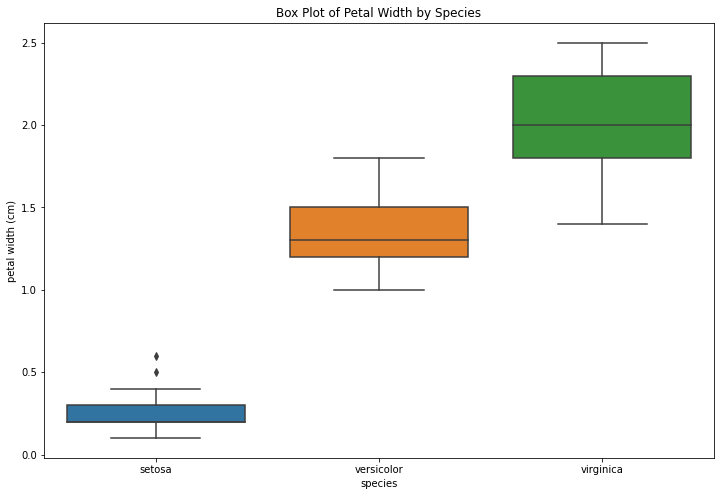

In [14]:
# Box plots for each feature by species
plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title('Box Plot of Sepal Length by Species')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='sepal width (cm)', data=iris_df)
plt.title('Box Plot of Sepal Width by Species')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='petal length (cm)', data=iris_df)
plt.title('Box Plot of Petal Length by Species')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='petal width (cm)', data=iris_df)
plt.title('Box Plot of Petal Width by Species')
plt.show()

# Multivariate Analysis

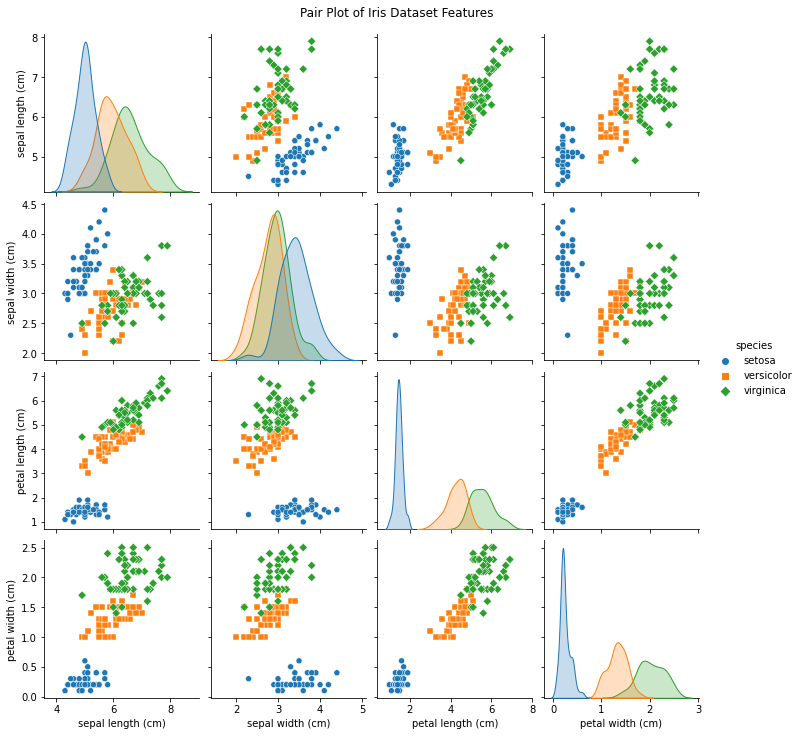

In [15]:
# Pair plot to analyze the relationships among multiple variables
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Dataset Features', y=1.02)
plt.show()


# Model Preparation

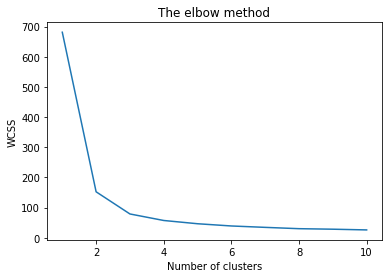

In [16]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [17]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Plotting Results

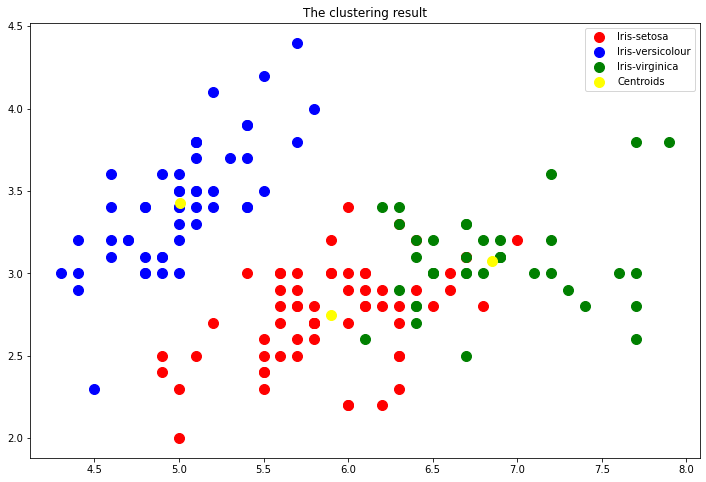

In [20]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(12, 8))  
plt.title('The clustering result')

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Thank you...